# GOOGLE PLAY STORE APPS

##### Võ Hửu Nghĩa

 ## I. DATA PROCESSING


 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

 ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [2]:
google_playstore_df = pd.read_csv('./googleplaystore.csv')
google_playstore_df.head(3)    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Hiển thị tên các cột 

In [3]:
google_playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Cho biết tổng số dòng và tổng số thuộc cột

In [4]:
google_playstore_df.shape

(10841, 13)

Xem kiểu dữ liệu của từng thuộc tính cũng như xem cột nào bị thiếu giá trị

In [5]:
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google_playstore_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


Xem thông tin của dòng 10472( theo tài liệu thì dòng này sẽ gây nhiễu đến quá trình phân tích)

In [7]:
google_playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Loại bỏ hàng 10472

In [8]:
google_playstore_df.drop(google_playstore_df.index[10472],inplace=True)

xem min, max của thuộc tính Installs

In [9]:
google_playstore_df['Installs'].min(),google_playstore_df['Installs'].max()

('0', '500,000,000+')

Xử lí dữ liệu cột Installs( xoá kí tự '+',',' , giảm độ lớn bằng cách lấy log10)

In [10]:
google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: x.replace('+','').replace(',','')).astype('int64')
google_playstore_df['log_installs'] = np.where(google_playstore_df['Installs'] > 0, np.log10(google_playstore_df['Installs']),0)
#google_playstore_df['log_installs'] = google_playstore_df['Installs']/1000





c:\Users\vhngh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Xử lí dữ liệu cột Size (loại bỏ những k,M, Varies with device, riêng giá trị chứa k thì đổi sang M bằng cách chia cho 1000, và chuyển sang kiểu dữ liệu số, sau đó đổi tên cột)

In [11]:
google_playstore_df['Size'] = google_playstore_df['Size'].map(lambda x: x.strip('M'))
google_playstore_df['Size'] = google_playstore_df['Size'].replace('Varies with device',np.nan)

def divide_if_contains_k(value):
    if isinstance(value, str) and 'k' in value:
        value = float(value[:-1]) / 1000
    return value
google_playstore_df['Size'] = google_playstore_df['Size'].apply(divide_if_contains_k)
google_playstore_df['Size'] = pd.to_numeric(google_playstore_df['Size'], errors='coerce')
google_playstore_df.rename(columns={'Size': 'Size(MB)'},inplace=True)



Kiểm tra có giá trị trùng lặp trong cột App hay không?

In [12]:
duplicated=google_playstore_df['App'].duplicated().any()
duplicated

True

xem dữ liệu bị trùng của cột App

In [13]:
google_playstore_df['App'].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9659, dtype: int64

Xoá tên app trùng lặp

In [14]:
google_playstore_df.drop_duplicates(subset = 'App',inplace=True)


In [15]:
google_playstore_df['App'].value_counts()

App
Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: count, Length: 9659, dtype: int64

Cài đặt các tham số cần thiết cho biểu đồ


In [16]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9,5)
# plt.rcParams['figure.facecolor'] = 'Black'

Đếm giá trị của từng thể loại

In [17]:
top_genres = google_playstore_df.Genres.value_counts().reset_index()
top_genres

,Genres,count
0,Tools,826
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
...,...,...
113,Art & Design;Pretend Play,1
114,Lifestyle;Pretend Play,1
115,Comics;Creativity,1
116,Art & Design;Action & Adventure,1


Hiển thị tổng số lượt tải và cài đặt trên từng thể loại 

In [18]:
genres_installs = google_playstore_df.groupby(['Genres'])['Installs'].sum().reset_index()
genres_installs.sample(10)

,Genres,Installs
71,Music,170120500
110,Travel & Local;Action & Adventure,100000
26,Casual,3052830740
112,Trivia;Education,100
84,Puzzle;Brain Games,140310000
53,Entertainment;Brain Games,23200000
105,Strategy;Creativity,1000000
107,Tools,7991771915
35,Communication,11038276251
58,Events,15973161


kết hợp 2 bảng trên lại với nhau

In [19]:
top_genres_installs = pd.merge(top_genres,genres_installs, on = 'Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs

,Genres,count,Installs
0,Tools,826,7991771915
1,Entertainment,561,3014714684
2,Education,510,258410148
3,Business,420,697164865
4,Medical,395,38193177
5,Personalization,376,1532494782
6,Productivity,374,5793091369
7,Lifestyle,368,493823539
8,Finance,345,455348734
9,Sports,331,1412474498


Trực quan hoá kết quả trên

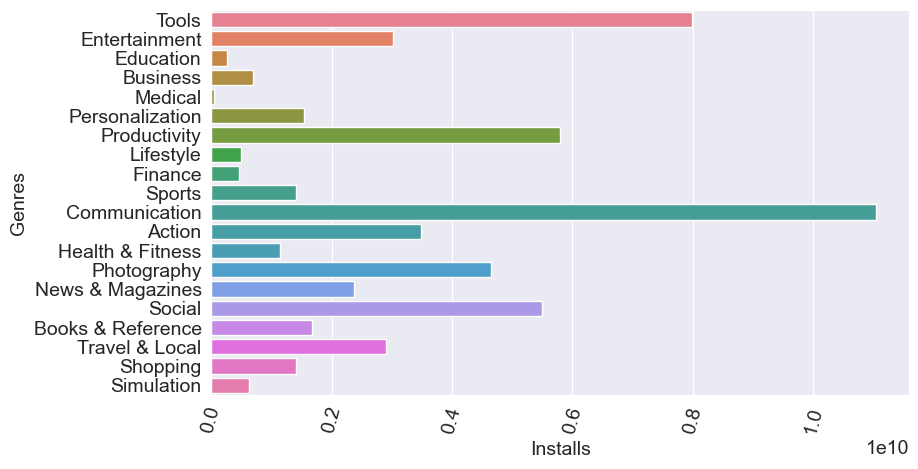

In [20]:
sns.barplot(y=top_20_genres_installs['Genres'], x=top_20_genres_installs['Installs'], hue=top_20_genres_installs.Genres)
plt.xticks(rotation = 75)
plt.show()

category

In [21]:
top_category = google_playstore_df['Category'].value_counts().reset_index()
top_category.sample(5)

,Category,count
18,DATING,171
6,PRODUCTIVITY,374
20,MAPS_AND_NAVIGATION,131
5,PERSONALIZATION,376
16,TRAVEL_AND_LOCAL,219


In [22]:
category_installs = google_playstore_df.groupby(['Category'])['log_installs'].sum().reset_index()
category_installs.sample(3)     

,Category,log_installs
31,VIDEO_PLAYERS,871.550560
1,AUTO_AND_VEHICLES,362.678370
4,BUSINESS,1402.274341


In [23]:
top_category_installs = pd.merge(top_category,category_installs, on = 'Category')
top_20_category_installs = top_category_installs.head(20)
top_20_category_installs.sample(3)

,Category,count,log_installs
0,FAMILY,1832,8242.831442
14,SOCIAL,239,1164.723780
10,COMMUNICATION,315,1527.907300


<Axes: xlabel='log_installs', ylabel='Category'>

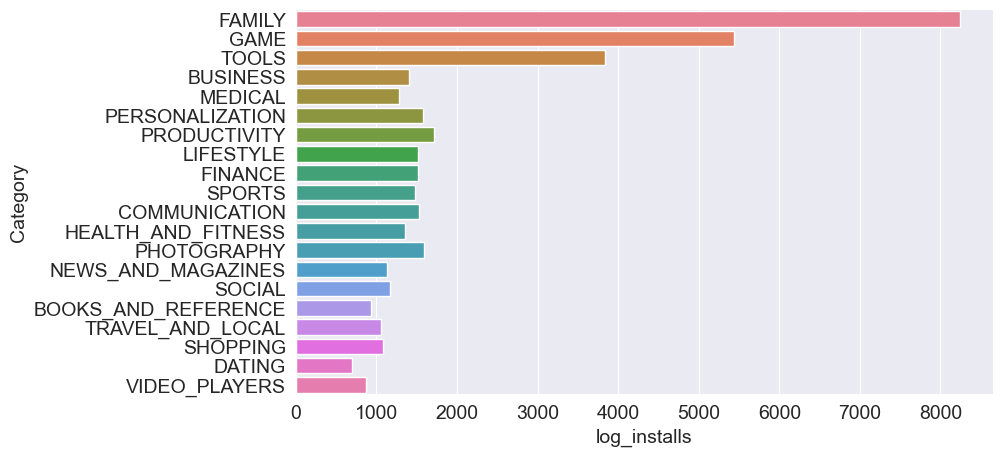

In [24]:
sns.barplot(x=top_20_category_installs['log_installs'],y= top_20_category_installs['Category'], hue=top_20_category_installs['Category'],legend=False)

<Axes: xlabel='count', ylabel='Category'>

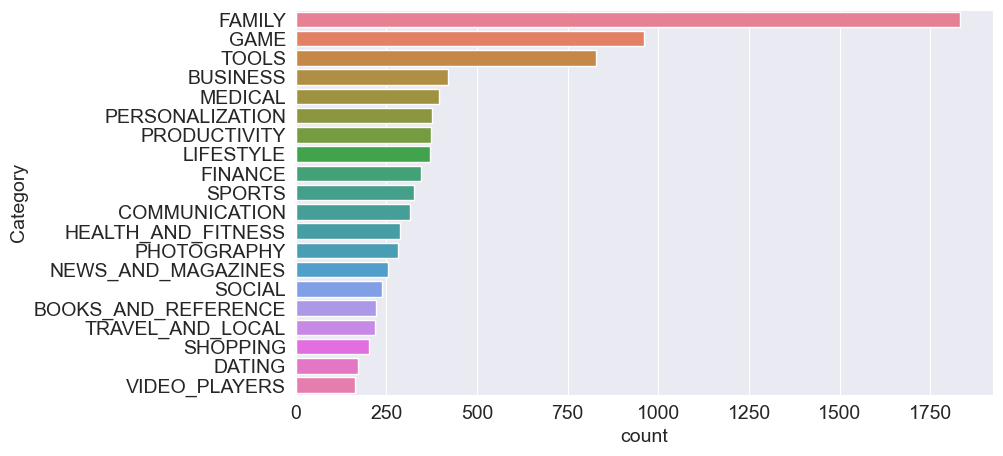

In [25]:
sns.barplot(x=top_20_category_installs['count'],y= top_20_category_installs['Category'], hue=top_20_category_installs['Category'],legend=False)

Rating

In [26]:
genres_rating_df = google_playstore_df.groupby(['Genres'])['Rating'].mean().reset_index()
genres_rating_df.sample(3)

,Genres,Rating
66,Lifestyle,4.093667
101,Sports,4.223308
63,Health & Fitness;Education,4.700000


In [27]:
genres_rating_installs = pd.merge(top_genres_installs,genres_rating_df,on='Genres')
genres_rating_installs

,Genres,count,Installs,Rating
0,Tools,826,7991771915,4.038912
1,Entertainment,561,3014714684,4.083439
2,Education,510,258410148,4.291375
3,Business,420,697164865,4.098479
4,Medical,395,38193177,4.166552
...,...,...,...,...
113,Art & Design;Pretend Play,1,500000,3.900000
114,Lifestyle;Pretend Play,1,10000000,4.000000
115,Comics;Creativity,1,50000,4.800000
116,Art & Design;Action & Adventure,1,100000,NaN


In [28]:
genres_rating_installs.sort_values('Rating',ascending=False,inplace=True)
genres_rating_installs

,Genres,count,Installs,Rating
108,Board;Pretend Play,1,100,4.8
115,Comics;Creativity,1,50000,4.8
110,Health & Fitness;Education,1,100000,4.7
93,Adventure;Brain Games,1,100000,4.6
87,Strategy;Action & Adventure,2,1100000,4.6
...,...,...,...,...
103,Parenting;Brain Games,1,1000000,3.8
92,Books & Reference;Creativity,1,100,NaN
95,Role Playing;Education,1,100,NaN
101,Trivia;Education,1,100,NaN


In [29]:
genres_rating_installs['Rating'].describe()

count    114.000000
mean       4.248680
std        0.182604
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

Text(0, 0.5, 'Frequency')

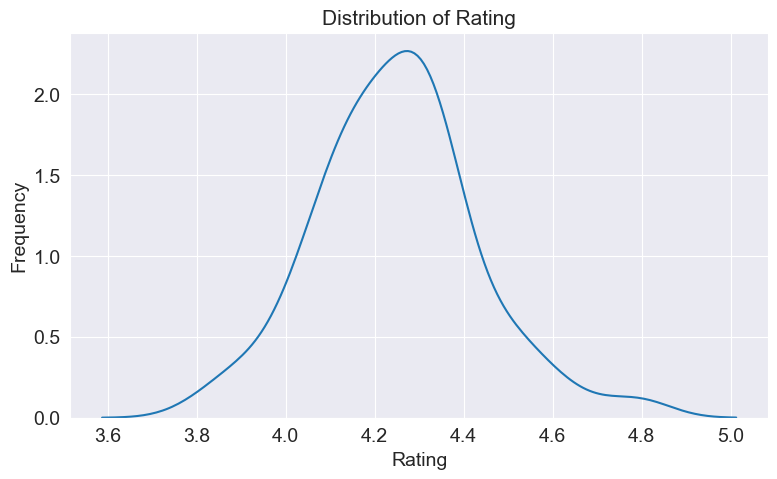

In [30]:
sns.kdeplot(genres_rating_installs['Rating'])
plt.title('Distribution of Rating',size = 15)
plt.xlabel('Rating')
plt.ylabel('Frequency')

App

In [37]:
genres_reviews_df = google_playstore_df.groupby(['Genres'])['Reviews'].sum().reset_index()
genres_reviews_df.head()

,Genres,Reviews
0,Action,5234162811860914973611030610004179904917671249...
1,Action;Action & Adventure,5255172168494305596269491076608198596045820054...
2,Adventure,1042492511073102133401526581311829265130505021...
3,Adventure;Action & Adventure,44473884764441273107582557
4,Adventure;Brain Games,7148


Kết hợp 2 dataframe là genres_reviews_df và genres_rating_df với thuộc tính chung là Genres

In [38]:
genres_reviews_rating_df = pd.merge(genres_reviews_df,genres_rating_df,on='Genres')
genres_reviews_rating_df.sample(3)

,Genres,Reviews,Rating
70,Medical,1135578129632161714571729211533921991361121520...,4.166552
49,Educational;Education,2026711618249361024119503660670504326429436965...,4.245714
5,Adventure;Education,288523,4.100000


Trực quan hoá số liệu trên, đồng thời làm giảm độ lớn của biến Reviews

Text(0, 0.5, 'Rating')

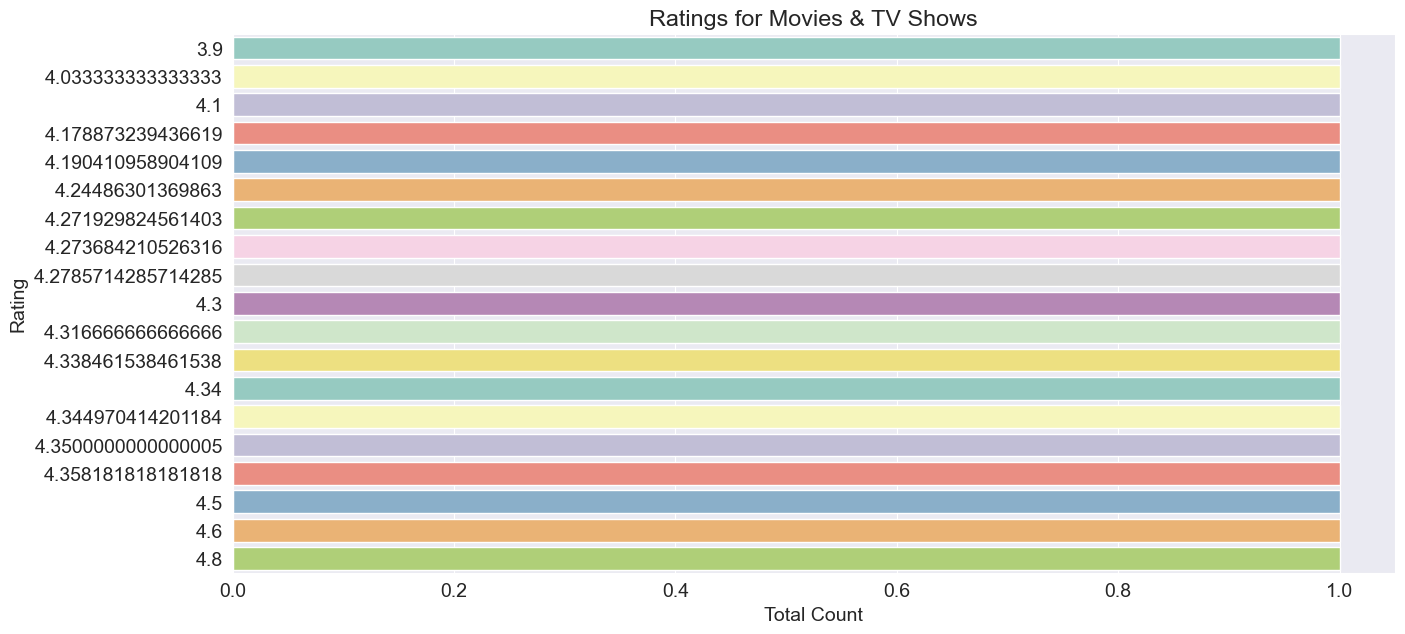

In [56]:

plt.figure(figsize=(15, 7))
top_20_genres_reviews_rating_df = genres_reviews_rating_df.head(20)
Rating = sns.countplot(y=top_20_genres_reviews_rating_df['Rating'],hue= top_20_genres_reviews_rating_df['Genres'], palette='Set3',legend=False)
Rating.set_title("Ratings for Movies & TV Shows")
Rating.set_xlabel("Total Count")
Rating.set_ylabel("Rating")
